# Simple Linear Regression

In this notebook, we'll built a linear regression model to predict the `Sales` using appropriate predictor variable.

## Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using pandas library.
2.Understanding the structure of the data.

In [1]:
# Importing numpy and pandas package

import numpy as np
import pandas as pd

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore') 

In [5]:
# Reading csv file

advertising = pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
advertising.shape

(200, 4)

In [7]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Visualising the Data

Let's now visualise our data using seaborn. We'll first make a pairplot of all variables present to visualise which variable are most correlated to `Sales`.

In [9]:
# Importing visualisation libraries

import matplotlib.pyplot as plt
import seaborn as sns

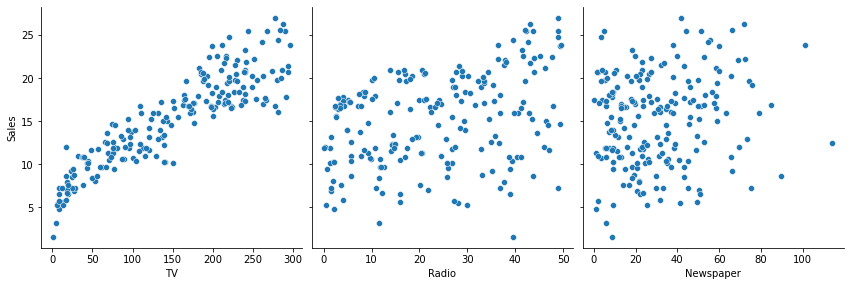

In [19]:
sns.pairplot(advertising, x_vars=['TV','Radio','Newspaper'], y_vars='Sales',size=4,aspect=1,kind='scatter')
plt.show()

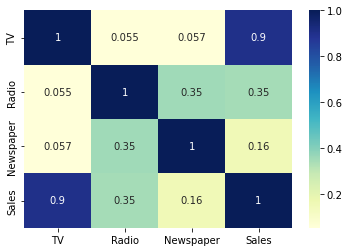

In [21]:
sns.heatmap(advertising.corr(),cmap='YlGnBu',annot=True)
plt.show()

**Insights:** As is visible from the pairplot and the heatmap, the variable `TV` seems to be more correlated with `Sales`.So let'so let's go ahead and perform simple linear regression using `TV` as our feature variable.

## Performing Simple Linear Regression using Statsmodels

In [22]:
X= advertising['TV']
y=advertising['Sales']

**Train-Test Split**

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
# Let's take alook at train dataset

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [34]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

**Building linear Model**

In [35]:
# Importing stats library

import statsmodels.api as sm

In [36]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the regression line using 'OLS'
lr =sm.OLS(y_train,X_train_sm).fit()

In [37]:
# Print parameters, i.e the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [38]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           1.52e-52
Time:                        20:06:38   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

**Insights:**

**1. The coefficient for TV is 0.054 which is very low p value.**

*The coefficient is statistically significant. So the association is not purely by chance.*

**2. R-squared is 0.816**

*Meaning that 81.6% of the variance in `Sales` is explained by `TV`.
This is a decent R-squared value.*

**3. F statistic has a very low p value(practically low)**

*Meaning that the model fit is statistically significant, and explained variance isn't purely by chance.*


---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

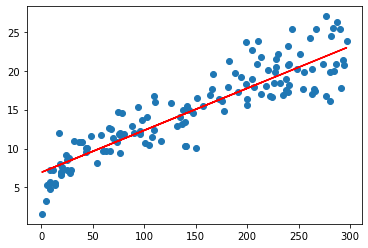

In [39]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948+0.054*X_train,'r')
plt.show()

## Residual Analysis

**Distribution of the error terms**

In [41]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train-y_train_pred)

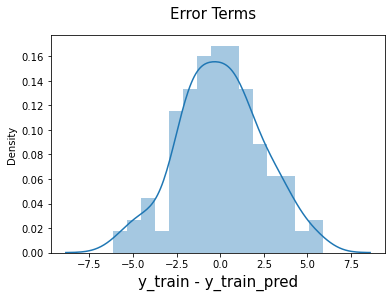

In [50]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

**Looking for patterns in the residuals**

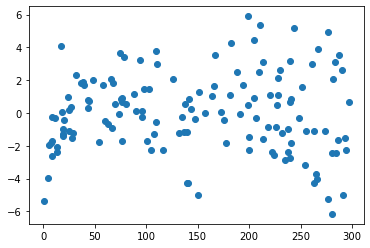

In [52]:
plt.scatter(X_train,res)
plt.show()

**Insights:**
    
- We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

- Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

- As you can see, the regression line is a pretty good fit to the data.


## Prediction on the Test Set

In [55]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_Sm
y_pred =lr.predict(X_test_sm)

In [56]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

***Looking at the RMSE***

In [59]:
# Return the mean squared error: we'll take a square root
np.sqrt(mean_squared_error(y_test,y_pred))

2.0192960089662333

***Checking the R-squared on the test set***

In [60]:
r_squared = r2_score(y_test,y_pred)
r_squared

0.7921031601245657

**Visualizing the fit on the test set**

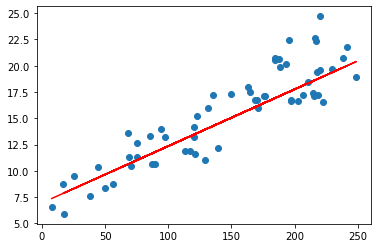

In [62]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948+0.054*X_test,'r')
plt.show()

**Conclusion:**

 We can predict sales value using: $ Sales = 6.948 + 0.054* TV $